In [1]:
#Загружаю необходимые библиотеки
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from collections import Counter
from datetime import datetime, timedelta
import statsmodels.api as sm
from sklearn import metrics

# 1. Exploratory Data Analysis

In [2]:
apdata = pd.read_csv('appl_data.csv') # загружаем персональные данные клиентов сначала

In [3]:
apdata.shape #количество строчек и столбцов в массиве данных

(8084, 23)

In [4]:
apdata.head()

,appl_id,app_crtime,client_id,birth,gender,pass_bdate,fam_status,quantity_child,max_age_child,property,...,region_reg,jobsworksince,work_experience,empl_state,empl_type,empl_worker_count,education_area,education,monthlyincome,monthlycost
0,1157589,2017-12-31T09:35:53Z,119804,1994-01-12,1,2010-10-08,4,1,3.0,5,...,10,NaN,3,4,NaN,NaN,7.0,2,15000.0,10000.0
1,1159012,2017-12-31T20:05:37Z,120147,1994-02-14,2,2010-04-06,4,0,0.0,5,...,11,2013-05-01,4,1,6.0,1.0,NaN,6,8000.0,6000.0
2,1157375,2017-12-31T08:18:56Z,119755,1984-10-20,2,2013-06-28,3,1,2.0,5,...,7,2015-12-01,10,1,10.0,6.0,6.0,7,15000.0,14000.0
3,1158541,2017-12-31T15:18:23Z,120042,1986-02-07,2,2012-09-27,4,0,0.0,5,...,10,2017-09-01,13,1,1.0,5.0,6.0,2,10000.0,5000.0
4,1157949,2017-12-31T11:25:38Z,119893,1992-06-26,2,2012-02-11,4,0,0.0,1,...,22,2014-08-01,3,1,10.0,5.0,3.0,1,7500.0,5000.0


In [5]:
apdata['app_crtime'] = pd.to_datetime(apdata['app_crtime'])
apdata['birth'] = pd.to_datetime(apdata['birth'])
apdata['pass_bdate'] = pd.to_datetime(apdata['pass_bdate'])
apdata['jobsworksince'] = pd.to_datetime(apdata['jobsworksince'])
apdata['lived_since'] = pd.to_datetime(apdata['lived_since'])
apdata['is_same_reg_lived_since'] = pd.to_datetime(apdata['is_same_reg_lived_since'])

In [6]:
apdata.describe()
#Как можно заметить, не все клиенты указали возраст ребенка, сферу деятельности и сферу образования, а также с какого времени на предыдущем месте работы

,appl_id,client_id,gender,fam_status,quantity_child,max_age_child,property,region,region_reg,work_experience,empl_state,empl_type,empl_worker_count,education_area,education,monthlyincome,monthlycost
count,8.084000e+03,8084.000000,8084.000000,8084.000000,8084.000000,4600.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,7138.000000,7138.000000,4728.000000,8084.000000,8084.000000,8084.000000
mean,7.561101e+05,79912.587333,1.642751,3.295893,0.573231,5.307826,3.038718,10.588817,13.208189,7.743320,2.012618,7.950406,3.908938,6.945431,3.258906,8147.017071,3956.751237
std,2.315366e+05,24402.753983,0.479219,0.930348,0.893960,7.664016,1.880471,6.148571,7.309514,7.363055,1.628975,3.936522,1.741563,3.072563,2.261160,6880.490610,4057.347498
min,3.202020e+05,431.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,5.569778e+05,63540.750000,1.000000,3.000000,0.000000,0.000000,1.000000,6.000000,7.000000,3.000000,1.000000,5.000000,2.000000,4.000000,1.000000,5000.000000,2000.000000
50%,7.672290e+05,82083.000000,2.000000,4.000000,0.000000,2.000000,3.000000,9.000000,12.000000,6.000000,1.000000,8.000000,4.000000,6.000000,2.000000,7000.000000,3000.000000
75%,9.523328e+05,99627.250000,2.000000,4.000000,1.000000,8.000000,5.000000,15.000000,20.000000,10.000000,3.000000,12.000000,6.000000,10.000000,6.000000,9100.000000,5000.000000
max,1.159038e+06,120154.000000,2.000000,5.000000,20.000000,58.000000,6.000000,23.000000,27.000000,112.000000,6.000000,13.000000,6.000000,11.000000,7.000000,150000.000000,150000.000000


In [7]:
max(apdata['work_experience'])#Хм, 50 лет опыта работы я еще понимаю, но 112 как-то перебор:) Хотя возможно речь идет о месяцах работы, что тоже довольно странно

112

In [8]:
apdata['quantity_child'].unique()

array([ 1,  0,  2,  3, 15, 12,  4,  6,  5, 20,  7, 10,  8], dtype=int64)

In [9]:
#Посмотрим как у нас распределение с количеством детей у клиентов, в словаре ключ - количество детей, значение - количетсво повторений
Counter(apdata['quantity_child']) #Чето как-то даже не верится, что бывают люди, у которых больше 10 детей, ну да ладно, жесть

Counter({0: 4893,
         1: 2074,
         2: 912,
         3: 162,
         4: 22,
         5: 10,
         6: 3,
         7: 1,
         8: 1,
         10: 2,
         12: 2,
         15: 1,
         20: 1})

In [10]:
# Посчитаем возраст клиентов на момент заключения заявки
ages = apdata['app_crtime'] - apdata['birth']
apdata['ages'] = [ages.loc[i].total_seconds()/timedelta (days=365).total_seconds() for i in range(len(ages))]

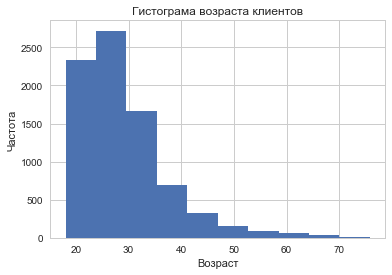

In [11]:
apdata['ages'].hist()
plt.title('Гистограма возраста клиентов')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.savefig('hist_age')
plt.show()
# Судя по гистограме наиболее частыми клиентами были люди от 20 до 30-35 лет

In [12]:
# Посчитаем время работы на последнем месте на момент заключения заявки
jobsworkage = apdata['app_crtime'] - apdata['jobsworksince']
apdata['jobsworkage'] = [jobsworkage.loc[i].total_seconds()/timedelta (days=365).total_seconds() for i in range(len(jobsworkage))]

In [13]:
# Посчитаем возраст получения паспорта клиентом
jobsworkage = apdata['app_crtime'] - apdata['jobsworksince']
apdata['jobsworkage'] = [jobsworkage.loc[i].total_seconds()/timedelta (days=365).total_seconds() for i in range(len(jobsworkage))]

In [14]:
# Посчитаем возраст получения паспорта клиентом
passage = apdata['pass_bdate'] - apdata['birth']
apdata['passage'] = [passage.loc[i].total_seconds()/timedelta (days=365).total_seconds() for i in range(len(passage))]

In [15]:
# Время проживания в последнем месте регистрации
lived_age = apdata['app_crtime'] - apdata['lived_since']
apdata['lived_age'] = [lived_age.loc[i].total_seconds()/timedelta (days=365).total_seconds() for i in range(len(lived_age))]

In [16]:
# Время прописки в последнем месте регистрации
reg_lived = apdata['app_crtime'] - apdata['is_same_reg_lived_since']
apdata['reg_lived'] = [reg_lived.loc[i].total_seconds()/timedelta (days=365).total_seconds() for i in range(len(reg_lived))]

In [17]:
# Данные поведения клиентов на сайте
behdata = pd.read_csv('behav_on_site.csv')

In [18]:
# Предпочтения клентов в выборе браузера и платформы
lentht = behdata.groupby(['client_id']).agg(lambda x:x.value_counts().index[0]) # Групируем по наиболее частому повторению
del lentht['device_id'], lentht['create_time'], lentht['id_ref']

In [19]:
lentht.head()

,browser,platform
client_id,,
431,Chrome,Android
538,Chrome,Android
640,Chrome,Windows
656,Chrome,Android
854,Chrome,Android


In [20]:
Counter(lentht['browser'])

Counter({'Android': 58,
         'Chrome': 5745,
         'Edge': 43,
         'Firefox': 339,
         'Internet Explorer': 17,
         'Opera': 802,
         'Opera Mini': 2,
         'Pocket Internet Explorer': 2,
         'Safari': 18,
         'Vivalidi': 2,
         'Yandex': 540,
         'iPad': 37,
         'iPhone': 478,
         'unknown': 1})

In [21]:
#Уменьшим выборку номинативной переменной " предпочитаемый браузер"
lentht['browser'] = np.where(lentht['browser'] =='Opera Mini', 'Mobile', lentht['browser'])
lentht['browser'] = np.where(lentht['browser'] =='Pocket Internet Explorer', 'Mobile', lentht['browser'])
lentht['browser'] = np.where(lentht['browser'] =='Android', 'Mobile', lentht['browser'])
lentht['browser'] = np.where(lentht['browser'] =='Edge', 'Other', lentht['browser'])
lentht['browser'] = np.where(lentht['browser'] =='Internet Explorer', 'Other', lentht['browser'])
lentht['browser'] = np.where(lentht['browser'] =='Safari', 'Other', lentht['browser'])
lentht['browser'] = np.where(lentht['browser'] =='Vivalidi', 'Other', lentht['browser'])
lentht['browser'] = np.where(lentht['browser'] =='unknown', 'Other', lentht['browser'])
lentht['browser'] = np.where(lentht['browser'] =='iPad', 'iPhone', lentht['browser'])

In [22]:
Counter(lentht['platform'])

Counter({'Android': 3617,
         'Apple': 35,
         'Chrome OS': 2,
         'Linux': 81,
         'Linux/SMART-TV': 1,
         'Windows': 3749,
         'iPad': 41,
         'iPhone': 552,
         'unknown': 6})

In [23]:
#Уменьшим выборку номинативной переменной "предпочитаемая платформа"
lentht['platform'] = np.where(lentht['platform'] =='Chrome OS', 'Windows', lentht['platform'])
lentht['platform'] = np.where(lentht['platform'] =='iPad', 'Apple', lentht['platform'])
lentht['platform'] = np.where(lentht['platform'] =='iPhone', 'Apple', lentht['platform'])
lentht['platform'] = np.where(lentht['platform'] =='Linux/SMART-TV', 'Linux', lentht['platform'])
lentht['platform'] = np.where(lentht['platform'] =='unknown', 'Windows', lentht['platform'])

In [24]:
#Преобразуем в числовые данные
lentht['browser'] = lentht['browser'].astype('category').cat.codes
lentht['platform'] = lentht['platform'].astype('category').cat.codes

In [25]:
behdata.head()

,device_id,client_id,browser,platform,create_time,id_ref
0,641468,113731,Chrome,Android,2017-12-22 16:21:57.095129+00,1366
1,755106,114439,iPhone,iPhone,2017-12-23 23:38:30.521322+00,117
2,673875,112253,Chrome,Windows,2017-12-23 12:49:34.97261+00,2727
3,755106,114439,iPhone,iPhone,2017-12-23 23:38:30.967528+00,6606
4,744303,115639,Chrome,Windows,2017-12-25 15:36:59.451907+00,3200


In [26]:
behdata['create_time'] = pd.to_datetime(behdata['create_time'])

In [27]:
mind = behdata.groupby(['client_id']).min()['create_time']

In [28]:
maxd = behdata.groupby(['client_id']).max()['create_time']

In [29]:
countsite = Counter(behdata['client_id'])
countsite = pd.DataFrame.from_dict(countsite, orient = 'index')

In [30]:
lentht['site_visit'] = countsite

In [31]:
lentht['countt'] = (maxd - mind)
lentht['countt'] = [lentht['countt'].iloc[i].total_seconds() for i in range(len(lentht['countt']))]

In [32]:
lentht['site_frac'] = lentht['countt']/lentht['site_visit']
del lentht['countt']

In [33]:
len(behdata['device_id'].unique()) #вероятно, что раз количество девайсов меньше, чем количество клиентов, что заходили на сайт, вероятно некоторые клиенты заходили с одного девайса и возможно связаны между собой

8033

In [34]:
# Загрузим зависимую переменную, которую нам нужно исследовать
target = pd.read_csv('is_default.csv')

In [35]:
target_vis = target.dropna() # создадим новый массив, в котором пока удалим клиентов с пустыми значениями. 
# Вероятно это те клиенты, договор которых пока еще не подошел к концу, потому для них пока не заполнено "df"

In [36]:
target_vis['df'].value_counts() # как мы можем заметить почти четверть клиентов оказалась "плохими",
# попробуем определить взаимосвязь между качеством клиента и факторами, которые могут потенциально влиять

good    3010
bad      992
Name: df, dtype: int64

In [37]:
print( "Процент клиентов, что выполнили условия кредитования: " + str((target_vis['df'].value_counts()['good']/(target_vis['df'].value_counts()['good'] + target_vis['df'].value_counts()['bad']))*100) + "%")

Процент клиентов, что выполнили условия кредитования: 75.21239380309845%


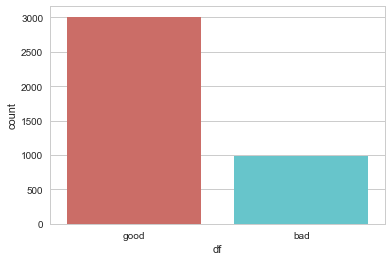

In [38]:
sns.countplot(x = 'df', data = target_vis, palette = 'hls' )
plt.show()

In [39]:
data = pd.merge(apdata, target, on = 'appl_id')

In [40]:
data.columns

Index(['appl_id', 'app_crtime', 'client_id', 'birth', 'gender', 'pass_bdate',
       'fam_status', 'quantity_child', 'max_age_child', 'property',
       'lived_since', 'is_same_reg_lived_since', 'region', 'region_reg',
       'jobsworksince', 'work_experience', 'empl_state', 'empl_type',
       'empl_worker_count', 'education_area', 'education', 'monthlyincome',
       'monthlycost', 'ages', 'jobsworkage', 'passage', 'lived_age',
       'reg_lived', 'df'],
      dtype='object')

In [41]:
del data['app_crtime'], data['birth'], data['pass_bdate'], data['lived_since'], data['is_same_reg_lived_since'], data['jobsworksince']

In [42]:
pd.set_option('display.max_columns', 30)
data.dropna().groupby('df').mean()

,appl_id,client_id,gender,fam_status,quantity_child,max_age_child,property,region,region_reg,work_experience,empl_state,empl_type,empl_worker_count,education_area,education,monthlyincome,monthlycost,ages,jobsworkage,passage,lived_age,reg_lived
df,,,,,,,,,,,,,,,,,,,,,,
bad,559392.620915,64976.209150,1.601307,2.647059,1.281046,6.071895,3.424837,10.294118,12.477124,10.934641,1.784314,8.313725,4.084967,7.202614,1.437908,8559.934641,4215.065359,33.092791,3.936501,22.072540,15.718165,17.577758
good,558003.852224,64204.463415,1.479197,2.796270,1.285509,5.856528,3.248207,10.375897,12.899570,11.540890,1.680057,8.317073,3.971306,6.575323,1.505022,9473.121951,4577.882353,33.669465,5.194286,22.544887,14.336268,17.033425


Как мы можем заметить, средний возраст практически одинаковый у плохих и хороших клиентов
Средние траты и доход больший у хороших клиентов, вероятно имеет смысл оставить эту переменную. Опыт работы у клиентов ,что 
выполняют условия значительно больше, так что эта переменная тоже вероятно играет роль. Как мы можем заметить, сфера деятельности, 
количетсво сотрудников и количество детей распределено схожим образом как у хороших, так и плохих клиентов. Попробуем повести 
дополнительный анализ

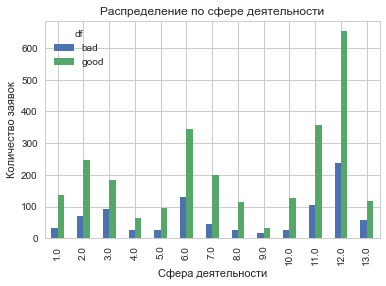

In [43]:
%matplotlib inline
pd.crosstab(data['empl_type'],data['df']).plot(kind='bar')
plt.title('Распределение по сфере деятельности')
plt.xlabel('Сфера деятельности')
plt.ylabel('Количество заявок')
plt.show()
#Как мы можем заметить, сфера деятельности может влиять на тип клиента

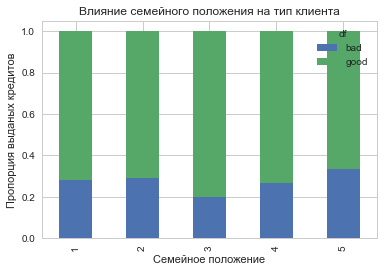

In [44]:
# Как мы можем заметить, семейоне положение тоже имеет определенное влияние
table=pd.crosstab(data['fam_status'],data['df'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Влияние семейного положения на тип клиента')
plt.xlabel('Семейное положение')
plt.ylabel('Пропорция выданых кредитов')
plt.show()

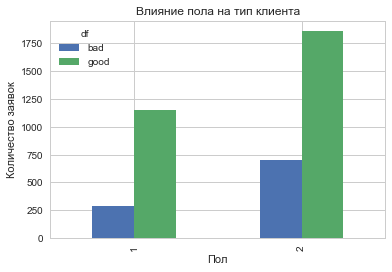

In [45]:
pd.crosstab(data['gender'],data['df']).plot(kind='bar')
plt.title('Влияние пола на тип клиента')
plt.xlabel('Пол')
plt.ylabel('Количество заявок')
plt.show()

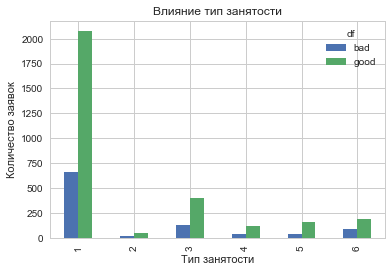

In [46]:
pd.crosstab(data['empl_state'],data['df']).plot(kind='bar')
plt.title('Влияние тип занятости')
plt.xlabel('Тип занятости')
plt.ylabel('Количество заявок')
plt.show()
#Тип занятости тоже можест стать хорошим предиктором

In [47]:
del data['appl_id']

In [48]:
data.set_index('client_id', inplace = True)

In [49]:
#Итак, соберем весь массив целиком
data = data.join(lentht, how = 'inner')

In [50]:
#Исключим клиентов, которые пока не выполнили соглажение
data = data.dropna(subset = ['df'])

In [51]:
#Заменим пустые ячейки нулями и преобразуем осташиеся категорийные значения
data = data.fillna(0)
data['df'] = data['df'].astype('category').cat.codes

In [52]:
data.head()

,gender,fam_status,quantity_child,max_age_child,property,region,region_reg,work_experience,empl_state,empl_type,empl_worker_count,education_area,education,monthlyincome,monthlycost,ages,jobsworkage,passage,lived_age,reg_lived,df,browser,platform,site_visit,site_frac
client_id,,,,,,,,,,,,,,,,,,,,,,,,,
87198,1,4,0,0.0,5,18,22,5,1,13.0,1.0,0.0,6,6500.0,4000.0,27.448404,2.253883,16.304110,0.336075,0.336075,0,0,0,13,70.090761
50111,1,3,2,4.0,1,1,2,2,3,12.0,6.0,0.0,6,6000.0,1500.0,24.669773,2.672512,20.093151,2.143745,2.143745,0,0,0,122,84912.368109
78479,2,4,0,0.0,5,6,8,8,1,6.0,5.0,11.0,2,7000.0,3000.0,26.837482,0.747071,16.597260,0.747071,24.933373,0,0,0,19,109324.104282
87254,1,1,0,0.0,1,3,8,5,1,12.0,6.0,0.0,6,9500.0,2500.0,24.607538,1.503428,18.106849,1.503428,24.686990,1,0,0,15,43.281071
87108,1,4,0,0.0,5,18,22,3,1,12.0,5.0,10.0,2,7500.0,4500.0,22.554998,0.998834,17.090411,22.601574,22.601574,1,0,0,18,136.334961


In [53]:
data.columns

Index(['gender', 'fam_status', 'quantity_child', 'max_age_child', 'property',
       'region', 'region_reg', 'work_experience', 'empl_state', 'empl_type',
       'empl_worker_count', 'education_area', 'education', 'monthlyincome',
       'monthlycost', 'ages', 'jobsworkage', 'passage', 'lived_age',
       'reg_lived', 'df', 'browser', 'platform', 'site_visit', 'site_frac'],
      dtype='object')

In [54]:
"""
Итак, входные данные:


Аппликационные данные клиента:

1. client_id - идентификатор клиента
2. gender - пол клиента(номинативная переменная)
3. fam_status - семейное положение(номинативная переменная)
4. quantity_child - количество детей(дискретная количественная переменная)
5. max_age_child - возраст старшого ребенка(дискретная количественная переменная)
6. property - тип имущества(номинативная переменная)
7. region - область проживания(номинативная переменная)
8. region_reg - область регистрации(номинативная переменная)
9. work_experience - опыт работы(дискретная количественная переменная)
10. empl_state - тип занятости(номинативная переменная)
11. empl_type - сфера деятельности(номинативная переменная)
12. empl_worker_count - количество работников на месте работы(дискретная количественная переменная)
13. education_area - сфера образования(номинативная переменная)
14. education - тип образования(номинативная переменная)
15. monthlyincome - месячный доход(количественная переменная)
16. monthlycost - месячные убытки(количественная переменная)
17. age - возраст клиента(количественная переменная)
18. jobsworkage - сколько лет работает на последнем месте работы(количественная переменная)
19. passage - во сколько лет получил паспорт(количественная переменная)
20. lived_age - сколько лет живет в последнем месте прописки(количественная переменная)
21. reg_lived - сколько лет прописан в последнем месте прописки(количественная переменная)

Данные поведения клиента на сайте:
22. site_visit - количество посещений сайта(количественная переменная)
23. site_frac - частота посещения сайта(количественная переменная)
24. brouser - наиболее частоиспользующийся браузер(номинативная переменная)
25. platform - наиболее частоиспользовавшаяся платформа(номинативная переменная)

Целевая функция - колонка df - выполнил ли клиент соглажение

"""

'\nИтак, входные данные:\n\n\nАппликационные данные клиента:\n\n1. client_id - идентификатор клиента\n2. gender - пол клиента(номинативная переменная)\n3. fam_status - семейное положение(номинативная переменная)\n4. quantity_child - количество детей(дискретная количественная переменная)\n5. max_age_child - возраст старшого ребенка(дискретная количественная переменная)\n6. property - тип имущества(номинативная переменная)\n7. region - область проживания(номинативная переменная)\n8. region_reg - область регистрации(номинативная переменная)\n9. work_experience - опыт работы(дискретная количественная переменная)\n10. empl_state - тип занятости(номинативная переменная)\n11. empl_type - сфера деятельности(номинативная переменная)\n12. empl_worker_count - количество работников на месте работы(дискретная количественная переменная)\n13. education_area - сфера образования(номинативная переменная)\n14. education - тип образования(номинативная переменная)\n15. monthlyincome - месячный доход(количе

# Logistic Regression

Создадим фиктивные переменные( dummy variables )

In [55]:
data.columns

Index(['gender', 'fam_status', 'quantity_child', 'max_age_child', 'property',
       'region', 'region_reg', 'work_experience', 'empl_state', 'empl_type',
       'empl_worker_count', 'education_area', 'education', 'monthlyincome',
       'monthlycost', 'ages', 'jobsworkage', 'passage', 'lived_age',
       'reg_lived', 'df', 'browser', 'platform', 'site_visit', 'site_frac'],
      dtype='object')

In [56]:
cat_vars=['gender','fam_status','property','region','region_reg','empl_state','empl_type',
          'education_area','education','browser', 'platform']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['gender','fam_status','property','region','region_reg','empl_state','empl_type',
          'education_area','education','browser', 'platform']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [57]:
#Получаем новый набор данных
data_final=data[to_keep]
data_final.columns.values

array(['quantity_child', 'max_age_child', 'work_experience',
       'empl_worker_count', 'monthlyincome', 'monthlycost', 'ages',
       'jobsworkage', 'passage', 'lived_age', 'reg_lived', 'df',
       'site_visit', 'site_frac', 'gender_1', 'gender_2', 'fam_status_1',
       'fam_status_2', 'fam_status_3', 'fam_status_4', 'fam_status_5',
       'property_1', 'property_2', 'property_3', 'property_4',
       'property_5', 'property_6', 'region_1', 'region_2', 'region_3',
       'region_4', 'region_5', 'region_6', 'region_7', 'region_8',
       'region_9', 'region_10', 'region_11', 'region_12', 'region_13',
       'region_14', 'region_15', 'region_16', 'region_17', 'region_18',
       'region_19', 'region_20', 'region_21', 'region_22', 'region_23',
       'region_reg_1', 'region_reg_2', 'region_reg_3', 'region_reg_4',
       'region_reg_5', 'region_reg_6', 'region_reg_7', 'region_reg_8',
       'region_reg_9', 'region_reg_10', 'region_reg_11', 'region_reg_12',
       'region_reg_13', 'regi

In [58]:
#Для избежания несбалансированности данных в класификаторе используем местод дискретизации "SMOTE"
X = data_final.loc[:, data_final.columns != 'df']
y = data_final.loc[:, data_final.columns == 'df']
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['df'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of bad clients in oversampled data",len(os_data_y[os_data_y['df']==0]))
print("Number of good clients",len(os_data_y[os_data_y['df']==1]))
print("Proportion of bad client`s data in oversampled data is ",len(os_data_y[os_data_y['df']==0])/len(os_data_X))
print("Proportion of good client`s data in oversampled data is ",len(os_data_y[os_data_y['df']==1])/len(os_data_X))

length of oversampled data is  4812
Number of bad clients in oversampled data 2406
Number of good clients 2406
Proportion of bad client`s data in oversampled data is  0.5
Proportion of good client`s data in oversampled data is  0.5


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [108]:
#Избавимся от коллинеарности переменных методом RFE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
data_final_vars=data_final.columns.values.tolist()
y=['df']
X=[i for i in data_final_vars if i not in y]
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklea

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklea

[False False False False False False False False False False False False
 False  True False False  True  True False False False False  True False
  True  True  True False  True False  True  True  True  True  True  True
  True False  True  True  True  True  True False False  True False  True
  True False  True  True  True  True False  True  True  True False  True
  True  True False False  True  True  True  True  True False False  True
  True False False  True False  True False False  True False False  True
 False  True  True False False  True  True  True  True False  True  True
  True  True False False False False  True False False False  True False
 False False  True False False False  True False False  True  True False
  True  True False False  True False]
[ 6 56 55 52 62 61 39 45 40 49 50 58 63  1 46  5  1  1 60  7 38 26  1 33
  1  1  1 53  1 31  1  1  1  1  1  1  1 59  1  1  1  1  1 21 18  1 16  1
  1 64  1  1  1  1 17  1  1  1 20  1  1  1 10 12  1  1  1  1  1  2 25  1
  1 43 19  1 

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [67]:
list(zip(X_train, clf.feature_importances_))

[('quantity_child', 0.013140087036795303),
 ('max_age_child', 0.015173070300034789),
 ('work_experience', 0.02919756610490813),
 ('empl_worker_count', 0.020845553844599733),
 ('monthlyincome', 0.02628238378204455),
 ('monthlycost', 0.02564135405007927),
 ('ages', 0.033664332375123354),
 ('jobsworkage', 0.03179361402485584),
 ('passage', 0.031284886243836435),
 ('lived_age', 0.03176822621016466),
 ('reg_lived', 0.030079724234697458),
 ('site_visit', 0.027110911053271118),
 ('site_frac', 0.029914650882829498),
 ('gender_1', 0.027015964709738723),
 ('gender_2', 0.04149672460623952),
 ('fam_status_1', 0.003308209323935636),
 ('fam_status_2', 0.00303043925455749),
 ('fam_status_3', 0.0299688654093491),
 ('fam_status_4', 0.016809857337307606),
 ('fam_status_5', 0.00026891181246766957),
 ('property_1', 0.03465336260422022),
 ('property_2', 0.0011154878389625358),
 ('property_3', 0.003653774687740753),
 ('property_4', 0.005665373032238007),
 ('property_5', 0.03579419469757069),
 ('property_6',

In [109]:
#Оставляем в массиве наиболее независимые переменные, расчитанные в предыдущем блоке
cols = []
for i in range(len(rfe.support_)):
    if rfe.support_[i]:
        cols.append(os_data_X.columns.values[i])

In [110]:
cols

['gender_1',
 'fam_status_2',
 'fam_status_3',
 'property_3',
 'property_5',
 'property_6',
 'region_1',
 'region_3',
 'region_5',
 'region_6',
 'region_7',
 'region_8',
 'region_9',
 'region_10',
 'region_11',
 'region_13',
 'region_14',
 'region_15',
 'region_16',
 'region_17',
 'region_20',
 'region_22',
 'region_23',
 'region_reg_2',
 'region_reg_3',
 'region_reg_4',
 'region_reg_5',
 'region_reg_7',
 'region_reg_8',
 'region_reg_9',
 'region_reg_11',
 'region_reg_12',
 'region_reg_13',
 'region_reg_16',
 'region_reg_17',
 'region_reg_18',
 'region_reg_19',
 'region_reg_20',
 'region_reg_23',
 'region_reg_24',
 'region_reg_27',
 'empl_state_2',
 'empl_state_5',
 'empl_type_1.0',
 'empl_type_3.0',
 'empl_type_4.0',
 'empl_type_7.0',
 'empl_type_8.0',
 'empl_type_9.0',
 'empl_type_10.0',
 'empl_type_12.0',
 'empl_type_13.0',
 'education_area_0.0',
 'education_area_1.0',
 'education_area_6.0',
 'education_area_10.0',
 'education_3',
 'education_7',
 'browser_2',
 'browser_3',
 'browse

In [111]:
X=os_data_X[cols]
y=os_data_y['df']

In [112]:
#Первая модель логистической регрессии, убираем переменные с P- значением > 5%
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.648941
         Iterations: 35
                                    Results: Logit
Model:                     Logit                   Pseudo R-squared:        0.064     
Dependent Variable:        df                      AIC:                     6371.4046 
Date:                      2018-10-25 13:10        BIC:                     6779.5733 
No. Observations:          4812                    Log-Likelihood:          -3122.7   
Df Model:                  62                      LL-Null:                 -3335.4   
Df Residuals:              4749                    LLR p-value:             1.2370e-55
Converged:                 0.0000                  Scale:                   1.0000    
No. Iterations:            35.0000                                                    
--------------------------------------------------------------------------------------
                     Coef.      Std.Err.      z    P>|z|      [0.025         0.975]   
-------------

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [115]:
cols=['gender_1',
 'fam_status_3',
 'property_3',
 'property_5',
 'region_6',
 'region_8',
 'region_9',
 'region_16',
 'region_17',
 'region_reg_8',
 'region_reg_11',
 'region_reg_20',
 'empl_state_2',
 'empl_state_5',
 'empl_type_1.0',
 'empl_type_3.0',
 'empl_type_4.0',
 'empl_type_9.0',
 'empl_type_12.0',
 'empl_type_13.0',
 'education_area_0.0',
 'education_area_1.0',
 'education_area_6.0',
 'education_3',
 'education_7',
 'browser_2']
X=os_data_X[cols]
y=os_data_y['df']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.659914
         Iterations 6
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.048     
Dependent Variable:  df               AIC:              6403.0091 
Date:                2018-10-25 13:17 BIC:              6571.4597 
No. Observations:    4812             Log-Likelihood:   -3175.5   
Df Model:            25               LL-Null:          -3335.4   
Df Residuals:        4786             LLR p-value:      6.1462e-53
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      6.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
gender_1            0.4885   0.0689  7.0902 0.0000  0.3535  0.6236
fam_status_3        0.4242   0.0691  6.1359 0.0000  0

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [117]:
#Рассчитываем точность прогноза
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.59


In [123]:
#Первый подмассив - правильно угаданные значения, второй - неверно
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[299 177]
 [215 272]]


In [119]:
#Отчет классификатора Логистическая регрессия 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.63      0.60       476
           1       0.61      0.56      0.58       487

   micro avg       0.59      0.59      0.59       963
   macro avg       0.59      0.59      0.59       963
weighted avg       0.59      0.59      0.59       963



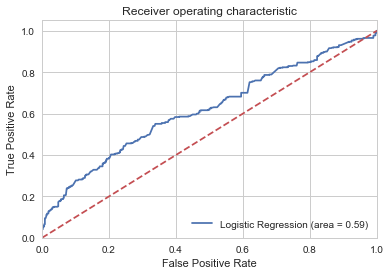

In [120]:
#Строим ROC-кривую, чем больше синяя линия отклонена от красной - тем лучше работает классификатор
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Random Forest Classication

In [61]:
#Попробую решить данную задачу методом СЛучайного леса на уже подготовленых данных
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1, random_state=0)

In [62]:
clf.fit(os_data_X, os_data_y)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [64]:
clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [65]:
#Точность прогноза
print('Accuracy of random forest classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))


Accuracy of random forest classifier on test set: 0.67


In [66]:
#"Важность" каждой переменной для классификатора
list(zip(X_train, clf.feature_importances_))

[('quantity_child', 0.013140087036795303),
 ('max_age_child', 0.015173070300034789),
 ('work_experience', 0.02919756610490813),
 ('empl_worker_count', 0.020845553844599733),
 ('monthlyincome', 0.02628238378204455),
 ('monthlycost', 0.02564135405007927),
 ('ages', 0.033664332375123354),
 ('jobsworkage', 0.03179361402485584),
 ('passage', 0.031284886243836435),
 ('lived_age', 0.03176822621016466),
 ('reg_lived', 0.030079724234697458),
 ('site_visit', 0.027110911053271118),
 ('site_frac', 0.029914650882829498),
 ('gender_1', 0.027015964709738723),
 ('gender_2', 0.04149672460623952),
 ('fam_status_1', 0.003308209323935636),
 ('fam_status_2', 0.00303043925455749),
 ('fam_status_3', 0.0299688654093491),
 ('fam_status_4', 0.016809857337307606),
 ('fam_status_5', 0.00026891181246766957),
 ('property_1', 0.03465336260422022),
 ('property_2', 0.0011154878389625358),
 ('property_3', 0.003653774687740753),
 ('property_4', 0.005665373032238007),
 ('property_5', 0.03579419469757069),
 ('property_6',

In [130]:
pd.crosstab( np.array(y_test), clf.predict(X_test), rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1
Actual Species,,
0,329,147
1,43,444


In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.69      0.78       476
           1       0.75      0.91      0.82       487

   micro avg       0.80      0.80      0.80       963
   macro avg       0.82      0.80      0.80       963
weighted avg       0.82      0.80      0.80       963



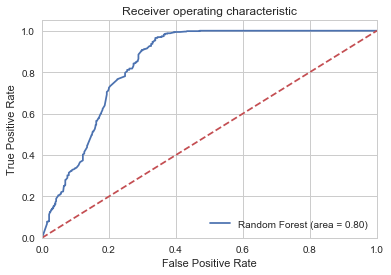

In [131]:
#Построим кривую проверки классификатора для Леса
clf_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('CLF_ROC')
plt.show()

Как мы видим с конкретной задачей Метод Случайного леса справляется лучше, чем Логистическая регрессия на 21% 

In [133]:
clf.score(X_test, y_test) - logreg.score(X_test, y_test)

0.20976116303219106